# Librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from datetime import datetime

# Importar datos

In [2]:
# Importamos los datos limpios desde la carpeta 'data':

memes = pd.read_csv('../data/clean_data/c_reddit_memes.csv')
programming = pd.read_csv('../data/clean_data/c_reddit_programming.csv')
science = pd.read_csv('../data/clean_data/c_reddit_science.csv')
relationships = pd.read_csv('../data/clean_data/c_reddit_relationships.csv')
usa = pd.read_csv('../data/clean_data/c_reddit_usa.csv')
canada = pd.read_csv('../data/clean_data/c_reddit_canada.csv')
uk = pd.read_csv('../data/clean_data/c_reddit_uk.csv')

# Datos de uso por país:

georeddit = pd.read_csv('../data/clean_data/c_georeddit.csv')

# Datos de Google Trends:

g_usa = pd.read_csv('../data/clean_data/c_google_usa.csv')
g_canada = pd.read_csv('../data/clean_data/c_google_canada.csv')
g_uk = pd.read_csv('../data/clean_data/c_google_uk.csv')

# Tabla conjunta:

activity = pd.read_csv('../data/clean_data/c_activity.csv')

# Tabla activity

Vamos a echar un primer ojo a esta tabla, en la que tenemos la información resumida de todas las fuentes. Primero pintemos las curvas de Google Trends juntas, que responden a la actividad relativa en cuanto a búsqueda de noticias locales:

In [3]:
activity.head()

,date,time,g_uk,g_canada,g_usa,r_usa,r_canada,r_uk,r_relationships,r_programming,r_memes,r_science
0,2023-08-02,15:00:00,79,61,62,6,50,25,25,45,33,40
1,2023-08-02,16:00:00,77,72,68,26,60,25,61,72,41,80
2,2023-08-02,17:00:00,76,70,65,26,40,0,54,45,25,80
3,2023-08-02,18:00:00,77,65,67,33,80,0,58,36,50,60
4,2023-08-02,19:00:00,80,72,79,26,70,0,61,27,50,20


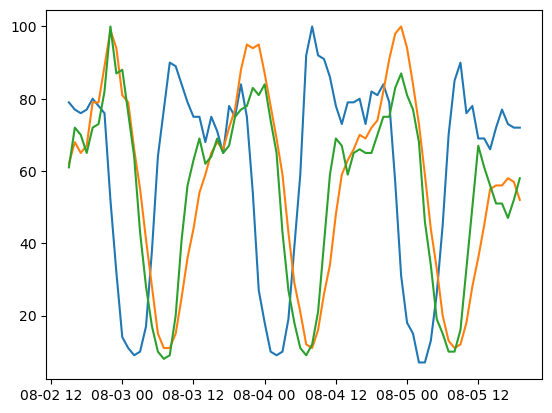

In [4]:
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_uk, label = 'g_uk');
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_usa, label = 'g_usa');
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_canada, label = 'g_canada');

Observamos que la actividad de las tres es similar a lo largo de los días en su estructura.
Podríamos señalar varios aspectos:

+ La de Estados Unidos y Canadá no están casi desfasadas, lo cuál es lógico ya que comparten franjas horarias.
+ La actividad de búsqueda de noticias en Inglaterra se reparte a lo largo de más horas, mientras que las de Estados Unidos y Canadá tiene un pico al final de la jornada.
+ El sábado (día 05) la actividad de búsqueda de noticias baja apreciablemente en los tres casos, aunque menos en Inglaterra que en el resto. 

Vamos a hacer una comparativa rápida entre la actividad que observamos en Estados Unidos según Google Trends y la que observamos en el subreddit r/usa:

# USA

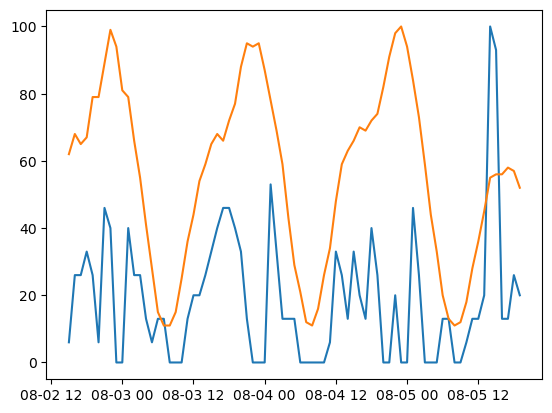

In [5]:
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.r_usa, label = 'r_usa');
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_usa, label = 'g_usa');

Podemos observar que encajan bastante bien, salvando la rugosidad de la curva de reddit que responde a un menor número de registros y por tanto a una menor resolución. De este gráfico podemos concluir dos cosas:

+ Es razonable inferir que la mayor parte de los usuarios que postean en r/usa son estadounidenses, ya que ambas curvas de actividad siguen patrones parecidos. 
+ El sábado, los estadounidenses miran menos las noticias y postean más!

El outlier del pico de actividad el sábado nos baja mucho el resto de la curva de r/usa, ya que los datos están normalizados. Echemos un ojo a los otros casos por países a ver si vemos algo similar.

# Canada

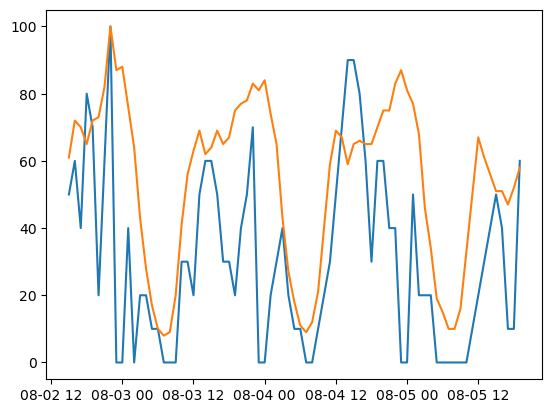

In [6]:
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.r_canada, label = 'r_canada');
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_canada, label = 'g_canada');

Interesante.. En este caso las curvas también encajan muy bien, indicándonos que los usuarios de r/canada podrían ser mayoritariamente canadienses. Por otro lado, no vemos la discrepancia de actividad el sábado que hemos visto en el caso de Estados Unidos. Sin más datos, que simplemente dejan el móvil en el sofá y hacen otras cosas.

# Inglatera

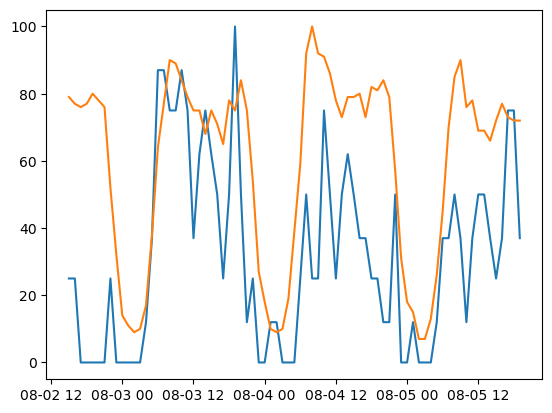

In [7]:
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.r_uk, label = 'r_uk');
plt.plot(pd.to_datetime(activity.time+' '+activity.date), activity.g_uk, label = 'g_uk');

En el caso de Inglaterra, las curvas vuelven a encajar en forma pero no tanto en densidad de actividad. Parece que el jueves hubo más posts que el resto de días, quizá ocurrió algún evento que dio a pie a ello. Echemos un ojo a los posts de ese día:

In [8]:
uk[uk.date == '2023-08-03']

,date,time,title,link
69,2023-08-03,22:52:35,Welsh police search for thief after 14 beehive...,https://b.thumbs.redditmedia.com/LuUocMWu52F99...
70,2023-08-03,21:33:45,Sadiq Khan expands London Ulez grant and scrap...,https://b.thumbs.redditmedia.com/3DMxBp_6_sCz1...
71,2023-08-03,20:05:56,Terrorism: What's behind surge in arrests of u...,https://b.thumbs.redditmedia.com/mRoJscFkq8i-s...
72,2023-08-03,20:00:33,HMS Prince of Wales due back in Portsmouth aft...,https://b.thumbs.redditmedia.com/WpebeHnDt9QzJ...
73,2023-08-03,19:48:22,Mail Online says Dan Wootton column on pause w...,https://b.thumbs.redditmedia.com/RuPBdmoZM4JvZ...
74,2023-08-03,19:45:55,Rishi Sunak's stand-in blasted for 'childish' ...,https://b.thumbs.redditmedia.com/Oc02900kAoODB...
75,2023-08-03,19:19:54,Shopping: John Lewis staff use bodycams to det...,https://b.thumbs.redditmedia.com/xDFBO3IQLxnyf...
76,2023-08-03,19:18:52,Harry Blake: Paedophile jailed on terror and i...,https://a.thumbs.redditmedia.com/JOCXmS8Ie11XT...
77,2023-08-03,18:52:21,Red Admiral butterflies: Climate change sees m...,https://b.thumbs.redditmedia.com/_ZY4H6fJ4I6Hp...
78,2023-08-03,18:50:37,Sarah Ferguson: Duchess of York names reconstr...,https://b.thumbs.redditmedia.com/DyCbK5howswwl...


Los temas son muy diversos. No parece que hubiera un evento particular que despertara la atención general, quizá los miércoles sean días activos para este reddit o para el posteo de los ingleses en general. Podría investigarse más a fondo de cara a estudios publicitarios.

# Otros subrredits: r/relationships, r/memes, r/programming y r/science

Echemos un vistazo gráfico a la actividad de otros subreddits. Pintemos la curva de actividad estadounidense también para todos ellos, para poder comparar.

Text(0.5, 1.0, 'r_science')

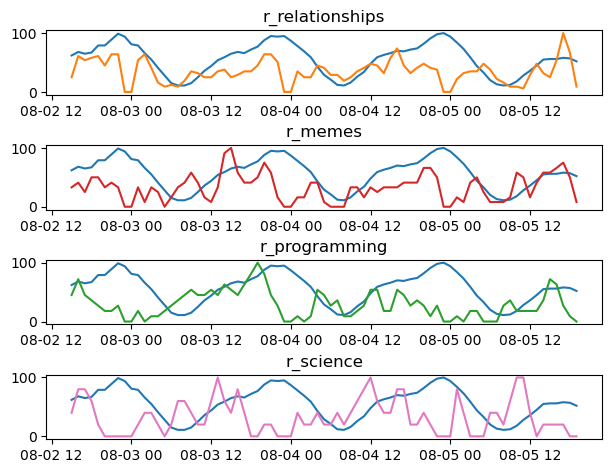

In [9]:
fig, ax = plt.subplots(4);
fig.tight_layout(pad=1.5);

ax[0].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.g_usa);
ax[0].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.r_relationships, 'tab:orange');
ax[0].set_title('r_relationships')

ax[1].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.g_usa);
ax[1].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.r_memes, 'tab:red');
ax[1].set_title('r_memes')
    
ax[2].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.g_usa);
ax[2].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.r_programming, 'tab:green')
ax[2].set_title('r_programming')
    
ax[3].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.g_usa, label = 'g_usa');
ax[3].plot(pd.to_datetime(activity.time+' '+activity.date), 
             activity.r_science, 'tab:pink');
ax[3].set_title('r_science')

Bueno, esto es interesante. Parece que la actividad de los subreddits no se ajusta al horario habitual estadounidense, que es el mayor protagonista en reddit según la tabla georredit: 

In [10]:
georeddit

,country,usage_percentage,users
0,United States,40.10,17700000000
1,Canada,6.25,2754000000
2,United Kingdom,5.68,2502000000
3,India,5.20,2291000000
4,Philippines,4.28,1886000000


Esto podría tener dos causas:

1) La gran mayoría de la gente es estadounidense, pero postea a horas intempestivas.
2) La gente sigue la misma curva de actividad que la que se refleja en Google Trends respecto a su país, pero es de husos horarios diversos.

Viendo que la actividad en los distintos foros es similar entre sí, podríamos concluir que la segunda conclusión es la acertada. Cabe destacar que en el subreddit de r/science el desfase es ligeramente mayor, lo que podría asociarse con una mayor proporción de algunos husos horarios concretos que en el resto. Por otro lado, en el subreddit de relaciones volvemos a ver un pico de actividad el sábado, lo que encaja bien con el tipo de foro.

# Las horas de mayor y menor actividad en reddit

Por último, busquemos las horas clave en los tres subreddits que tenemos asociados a una nacionalidad concreta. 
Para ello usaremos groupby y agruparemos por horas.

# r/usa, r/canada y r/uk

In [11]:
key_hours = activity.groupby('time').sum()[['r_usa','r_canada','r_uk']]

key_hours.head()

/tmp/ipykernel_23855/3178925848.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  key_hours = activity.groupby('time').sum()[['r_usa','r_canada','r_uk']]


,r_usa,r_canada,r_uk
time,,,
00:00:00,0,0,0
01:00:00,139,110,24
02:00:00,85,50,12
03:00:00,39,80,0
04:00:00,26,60,12


In [12]:
# Busquemos ahora por países:

# Estados Unidos

most1 = list(key_hours[key_hours.r_usa == key_hours.r_usa.max()].index)
least1 = list(key_hours[key_hours.r_usa == key_hours.r_usa.min()].index)

most1, least1

(['15:00:00'], ['00:00:00', '08:00:00', '09:00:00', '23:00:00'])

In [13]:
# Canada

most2 = list(key_hours[key_hours.r_canada == key_hours.r_canada.max()].index)
least2 = list(key_hours[key_hours.r_canada == key_hours.r_canada.min()].index)

most2, least2

(['15:00:00'], ['00:00:00', '07:00:00', '08:00:00', '23:00:00'])

In [14]:
# Inglaterra

most3 = list(key_hours[key_hours.r_uk == key_hours.r_uk.max()].index)
least3 = list(key_hours[key_hours.r_uk == key_hours.r_uk.min()].index)

most3, least3

(['07:00:00', '10:00:00', '14:00:00'], ['00:00:00', '03:00:00', '23:00:00'])

In [15]:
# Organicemos esta información en una tabla:

d = {'Valley_hours': [least1, least2, least3], 'Peak_hours': [most1, most2, most3]}

keytimes = pd.DataFrame(data = d)
keytimes.index = ['usa','canada','uk']

keytimes

,Valley_hours,Peak_hours
usa,"[00:00:00, 08:00:00, 09:00:00, 23:00:00]",[15:00:00]
canada,"[00:00:00, 07:00:00, 08:00:00, 23:00:00]",[15:00:00]
uk,"[00:00:00, 03:00:00, 23:00:00]","[07:00:00, 10:00:00, 14:00:00]"


In [16]:
# Por último,cambiamos las horas al horario local desde UTC:

dictio = {'usa':-6,
          'canada':-6,
          'uk': +1}

for i in range(3):
    for j in range(2):
        keytimes.iloc[i,j] = \
        [(pd.to_datetime(k)+timedelta(hours = dictio[keytimes.index[i]])).time() \
        for k in keytimes.iloc[i,j]]

keytimes

,Valley_hours,Peak_hours
usa,"[18:00:00, 02:00:00, 03:00:00, 17:00:00]",[09:00:00]
canada,"[18:00:00, 01:00:00, 02:00:00, 17:00:00]",[09:00:00]
uk,"[01:00:00, 04:00:00, 00:00:00]","[08:00:00, 11:00:00, 15:00:00]"


Con esta información se podrían diseñar estrategias publicitarias concretas para esos foros, teniendo en cuenta el contexto sociocultural concreto de cada uno y extrapolándolo a otros foros con dicha nacionalidad como objetivo.

# Todos los reddits, horas clave UTC

Si hacemos lo mismo teniendo en cuenta todos los foros y quedándonos simplemente con la hora internacional, encontramos estas horas clave:

In [17]:
key_hours_UTC = activity.groupby('time').sum()[['r_usa','r_canada','r_uk','r_relationships',
                                           'r_programming','r_memes','r_science']]

key_hours_UTC.head()

/tmp/ipykernel_23855/633859286.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  key_hours_UTC = activity.groupby('time').sum()[['r_usa','r_canada','r_uk','r_relationships',


,r_usa,r_canada,r_uk,r_relationships,r_programming,r_memes,r_science
time,,,,,,,
00:00:00,0,0,0,0,0,0,0
01:00:00,139,110,24,111,36,65,140
02:00:00,85,50,12,121,0,32,100
03:00:00,39,80,0,101,36,115,60
04:00:00,26,60,12,96,81,116,60


In [18]:
# Ahora necesitaríamos las sumas por filas:

total = [key_hours_UTC.iloc[i].sum() for i in range(key_hours_UTC.shape[0])]

key_hours_UTC['total'] = total

key_hours_UTC.head()

,r_usa,r_canada,r_uk,r_relationships,r_programming,r_memes,r_science,total
time,,,,,,,,
00:00:00,0,0,0,0,0,0,0,0
01:00:00,139,110,24,111,36,65,140,625
02:00:00,85,50,12,121,0,32,100,400
03:00:00,39,80,0,101,36,115,60,431
04:00:00,26,60,12,96,81,116,60,451


In [21]:
# Ordenemos los datos según esta última columna:

key_hours_UTC.sort_values(by = 'total', ascending = False)['total'].head()

time
16:00:00    1388
15:00:00    1263
17:00:00    1191
18:00:00    1052
14:00:00    1024
Name: total, dtype: int64

Estas serían las horas clave en horario UTC en que hay más actividad genérica en reddit. De cara a diseñar estrategias publicitarias o de comunicación concretas, habría que comprobar la actividad lectora y ampliar el estudio a más foros para sacar las conclusiones adecuadas.